In [1]:
import sum_funcs as scm

In [2]:
import numpy as np 
import matplotlib.pyplot as plt



#initial_pellet_size = 50 #microns
N = 100
rho_u = 79663.866
rho_uh3 =  45435.68 #0.045/(100**3)
b = 0.67
velocity = 0.5
rho_h = 0.081
p = 100000 #1 bar
a=1.11e-10
T = 293
initial_pellet_size = 360

In [3]:
r = scm.simulation(293,500,26600,N,1e-10,rho_h,rho_u,rho_uh3,velocity)

In [6]:
#----------------------------------------------------------------------------
#Initial Conditions with varying pellet size
T = 500

#calling the functions: 
def simulation(T, initial_pellet_size, p, N, a,rho_h,rho_u,velocity):
    shrinking_step = initial_pellet_size/N
    c_b =  p/(8.314*T)
    d = scm.diffusitivity_helium(T)
    viscosity = scm.visccosity(T)
    kr = scm.reaction_rate(T)  
    de = scm.diffusivity_constant(T, a)
    r_c = scm.core_radius(initial_pellet_size, shrinking_step)
    r_o = scm.outer_radius(initial_pellet_size, rho_u, rho_uh3, r_c,N)
    kg = scm.mass_transfer(r_o,d, viscosity, r_c, N, rho_h,velocity)
    const1 = scm.const(kr,kg, r_c, r_o,de,N)
    c_c = scm.core_concentration(c_b, const1,N)
    time = scm.time_taken(0.667, c_c, shrinking_step, kr,rho_u,N)
    x = r_c/initial_pellet_size
    relitive_sphere_radius = r_o/(initial_pellet_size*1e-6)
    pressure_change = (1800 - ((3/((4/3)*3.14*((initial_pellet_size*1e-6)**3)*19.1e6))*((4/3)*3.14*((initial_pellet_size*1e-6)**3 - (r_c*1e-6)**3))*rho_u*1.5*8.314*T/0.00048)/100)
    m = scm.thiele_modulus(initial_pellet_size , kr, c_c, de)
    y =  np.log10(c_c)
    results = [time, x, pressure_change, y, relitive_sphere_radius, m]
    return results

In [7]:
results_293 = simulation(293, 500, 26600, N, 1e-10, rho_h,rho_u,velocity)
results_303 = simulation(303, 500, 26600, N, 1e-10, rho_h,rho_u,velocity)
results_313 = simulation(313, 500, 26600, N, 1e-10, rho_h,rho_u,velocity)
results_323 = simulation(323, 500, 26600, N, 1e-10, rho_h,rho_u,velocity)


Now this is more organised, I am going to try and rewrite it such that it calculates the radius at each time, rather than the time that each radius dimension occurs.

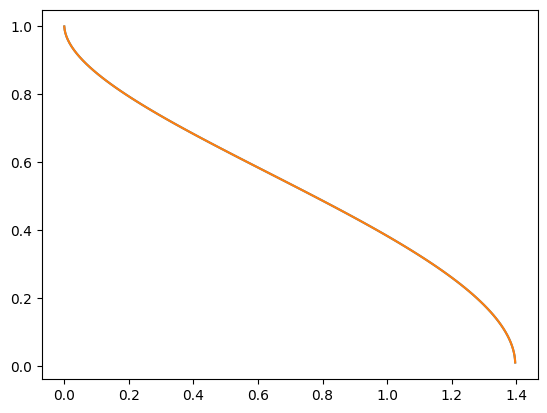

In [11]:
fig,ax = plt.subplots()
ax.plot(r[0][:-1]/10000000, r[1][:-1],label = '293K')
ax.plot(r[0][:-1]/10000000, r[1][:-1],label = '303K')

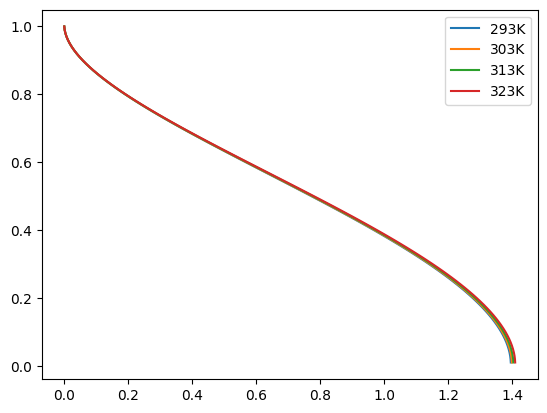

In [9]:
fig,ax = plt.subplots()
ax.plot(results_293[0][:-1]/10000000, results_293[1][:-1],label = '293K')
ax.plot(results_303[0][:-1]/10000000, results_303[1][:-1],label = '303K')
ax.plot(results_313[0][:-1]/10000000, results_313[1][:-1],label = '313K')
ax.plot(results_323[0][:-1]/10000000, results_323[1][:-1],label = '323K')
ax.legend();

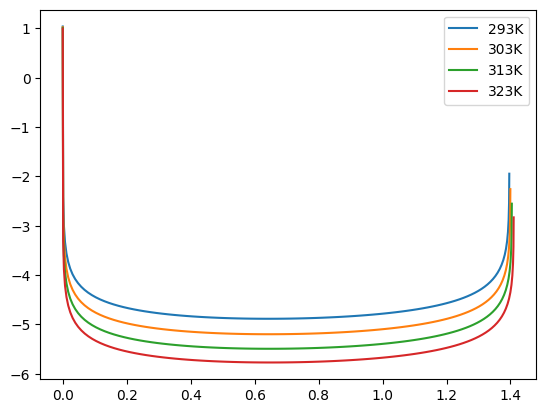

In [10]:
fig,ax = plt.subplots()
ax.plot(results_293[0][:-1]/10000000, results_293[3][:-1],label = '293K')
ax.plot(results_303[0][:-1]/10000000, results_303[3][:-1],label = '303K')
ax.plot(results_313[0][:-1]/10000000, results_313[3][:-1],label = '313K')
ax.plot(results_323[0][:-1]/10000000, results_323[3][:-1],label = '323K')
ax.legend();

In [ ]:
fig,ax = plt.subplots()
ax.plot(results_293[1][:-1], results_293[5][:-1]/100,label = '293K')
ax.plot(results_303[1][:-1], results_303[5][:-1]/100,label = '303K')
ax.plot(results_313[1][:-1], results_313[5][:-1]/100,label = '313K')
ax.plot(results_323[1][:-1], results_323[5][:-1]/100,label = '323K')
ax.legend();

In [14]:
resultstocompare = simulation(300, 300, 26600, N, 1e-10, rho_h,rho_u,velocity)


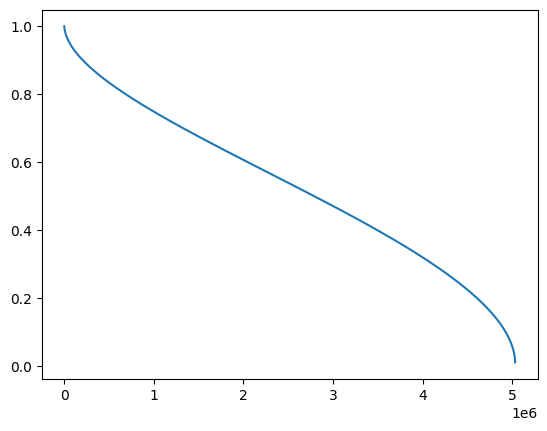

In [15]:
plt.plot(resultstocompare[0][:-1], r[1][:-1],label = 'compare')

In [ ]:
%matplotlib notebook
output = scm.visualise(time, outer_size,core_size,y)